**Assignment-1**
**Neural Networks**

In [59]:
!pip install tensorflow

**Load IMDB dataset with the top 10,000 most frequent words for training and testing sentiment analysis**


In [60]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [61]:
print(train_data,train_data.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [62]:
train_labels[0]

1

In [63]:
len(train_labels)

25000

In [64]:
test_labels[0]

0

In [65]:
max([max(sequence_647) for sequence_647 in test_data])

9999

**Decode the first review from the training data by converting word indices back to words using the reverse word index**

In [66]:
word_index_647 = imdb.get_word_index()
reverse_word_index_647 = dict(
    [(value, key) for (key, value) in word_index_647.items()])
decoded_review = " ".join(
    [reverse_word_index_647.get(i - 3, "?") for i in train_data[0]])

**Converts each sequence of integers into a binary vector of a specified dimension where the index is set to 1 if the word is present in the sequence**

In [67]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [68]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [69]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [70]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [71]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [72]:
from tensorflow import keras
from tensorflow.keras import layers

model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [73]:
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [74]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [75]:
## model planned to train with 20 epoch with batch size of 256
history = model647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.6817 - loss: 0.6398 - val_accuracy: 0.8355 - val_loss: 0.4689
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8744 - loss: 0.4105 - val_accuracy: 0.8742 - val_loss: 0.3543
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9044 - loss: 0.2983 - val_accuracy: 0.8864 - val_loss: 0.2999
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9242 - loss: 0.2319 - val_accuracy: 0.8875 - val_loss: 0.2824
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9371 - loss: 0.1933 - val_accuracy: 0.8823 - val_loss: 0.2893
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9457 - loss: 0.1672 - val_accuracy: 0.8867 - val_loss: 0.2773
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9591 - loss: 0.1373 - val_accuracy: 0.8855 - val_loss: 0.2909
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.9653 - loss: 0.1176 - val_accuracy: 0.8847 -

In [76]:
history_dict647 = history.history
history_dict647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

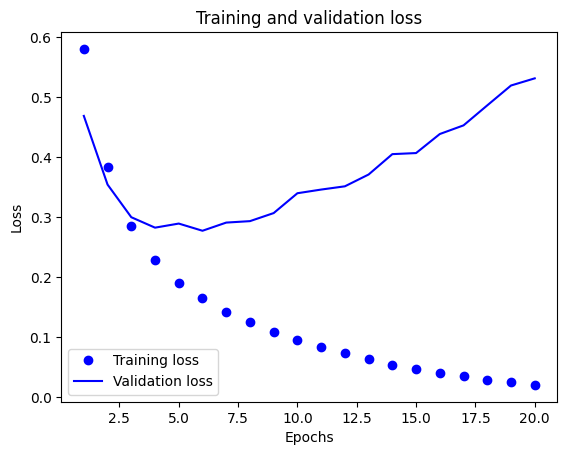

In [77]:
#Plotting the training loss vs validation loss
import matplotlib.pyplot as plot647
history_dict647 = history.history
loss_values = history_dict647["loss"]
val_loss_values = history_dict647["val_loss"]
epochs = range(1, len(loss_values) + 1)
plot647.plot(epochs, loss_values, "bo", label="Training loss")
plot647.plot(epochs, val_loss_values, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

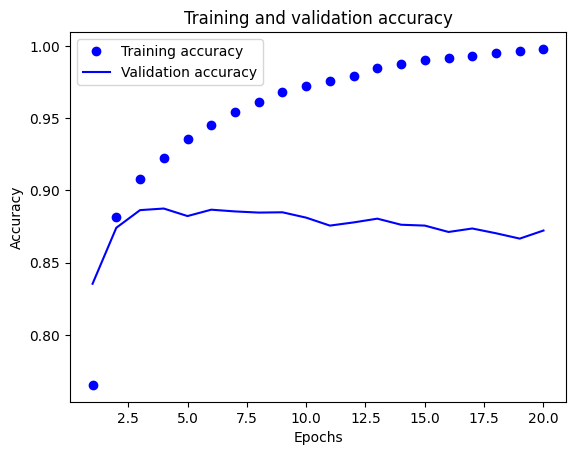

In [78]:
#Plotting training accuracy vs validatition accuracy
plot647.clf()
acc = history_dict647["accuracy"]
val_acc = history_dict647["val_accuracy"]
plot647.plot(epochs, acc, "bo", label="Training accuracy")
plot647.plot(epochs, val_acc, "b", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [79]:
model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model647.fit(x_train, y_train, epochs=4, batch_size=512)
results = model647.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7424 - loss: 0.5532
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8985 - loss: 0.2896
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9248 - loss: 0.2153
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9332 - loss: 0.1848
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8832 - loss: 0.2855


In [80]:
results

[0.2849089503288269, 0.8844799995422363]

In [81]:
model647.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.19164747],
       [0.99976003],
       [0.5941049 ],
       ...,
       [0.10002616],
       [0.07153597],
       [0.51432663]], dtype=float32)

In [82]:
model_647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val647 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val647 = y_train[:10000]
partial_y_train = y_train[10000:]


history_layer647 = model_647_layer.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val647, y_val647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7040 - loss: 0.5990 - val_accuracy: 0.8585 - val_loss: 0.4245
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8852 - loss: 0.3752 - val_accuracy: 0.8757 - val_loss: 0.3475
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9104 - loss: 0.2898 - val_accuracy: 0.8855 - val_loss: 0.3083
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9216 - loss: 0.2438 - val_accuracy: 0.8873 - val_loss: 0.2907
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9342 - loss: 0.2061 - val_accuracy: 0.8873 - val_loss: 0.2818
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9479 - loss: 0.1808 - val_accuracy: 0.8881 - val_loss: 0.2796
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9477 - loss: 0.1641 - val_accuracy: 0.8869 - val_loss: 0.2758
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9566 - loss: 0.1471 - val_accuracy: 0.8862 - v

**Extract the history of model training from history_layer647 and display the keys of the history dictionary**

In [83]:
history_dict647 = history_layer647.history
history_dict647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

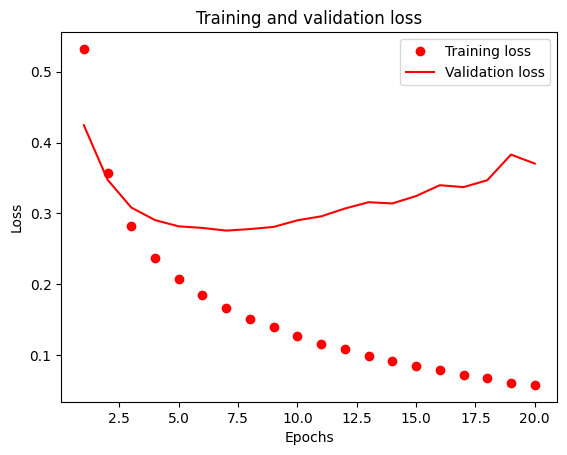

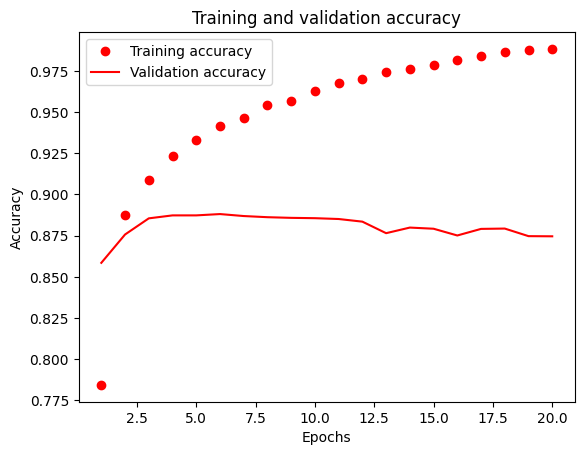

In [84]:
import matplotlib.pyplot as plot647
history_dict647 = history_layer647.history
loss_value647 = history_dict647["loss"]
val_loss_value647 = history_dict647["val_loss"]
epochs647 = range(1, len(loss_value647) + 1)

#Plotting graph of Training and Validation loss
plot647.plot(epochs647, loss_value647, "ro", label="Training loss")
plot647.plot(epochs647, val_loss_value647, "r", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

#Plotting graph of Training and Validation Accuracy
plot647.clf()
accuracy647 = history_dict647["accuracy"]
val_accuracy1 = history_dict647["val_accuracy"]
plot647.plot(epochs647, accuracy647, "ro", label="Training accuracy")
plot647.plot(epochs647, val_accuracy1, "r", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [85]:
model_647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_647_layer.fit(x_train, y_train, epochs=5, batch_size=512)
result_647_layer = model_647_layer.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7519 - loss: 0.5362
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9017 - loss: 0.3006
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9220 - loss: 0.2356
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9275 - loss: 0.2066
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9374 - loss: 0.1811
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8871 - loss: 0.2804


In [86]:
print(result_647_layer)

[0.27885910868644714, 0.8884000182151794]


In [87]:
model_647_layer.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.23275131],
       [0.9998543 ],
       [0.8417611 ],
       ...,
       [0.1360763 ],
       [0.08439167],
       [0.5835538 ]], dtype=float32)

In [88]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3_647 = x_train[:10000]
partial_x_train_647 = x_train[10000:]

y_val3_647 = y_train[:10000]
partial_y_train_647 = y_train[10000:]

history_3_layers_647 = model_3_layers_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3_647, y_val3_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5821 - loss: 0.6564 - val_accuracy: 0.8516 - val_loss: 0.4921
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8833 - loss: 0.4087 - val_accuracy: 0.8768 - val_loss: 0.3384
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9183 - loss: 0.2641 - val_accuracy: 0.8878 - val_loss: 0.2936
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9356 - loss: 0.1994 - val_accuracy: 0.8887 - val_loss: 0.2771
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9509 - loss: 0.1582 - val_accuracy: 0.8863 - val_loss: 0.2847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9564 - loss: 0.1338 - val_accuracy: 0.8688 - val_loss: 0.3478
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9611 - loss: 0.1186 - val_accuracy: 0.8794 - val_loss: 0.3180
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9752 - loss: 0.0898 - val_accuracy: 0.8796 - v

In [89]:
history_dict_3_647 = history_3_layers_647.history
history_dict_3_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

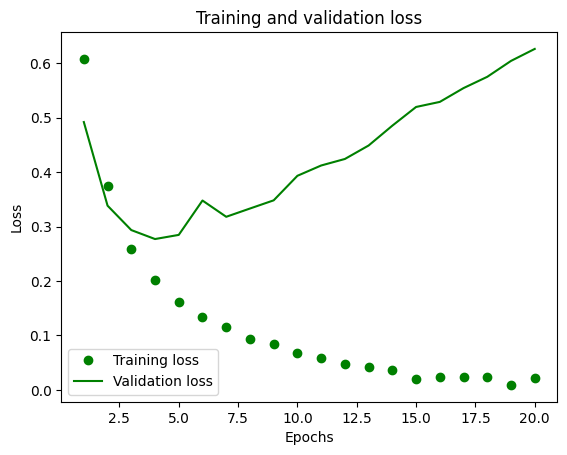

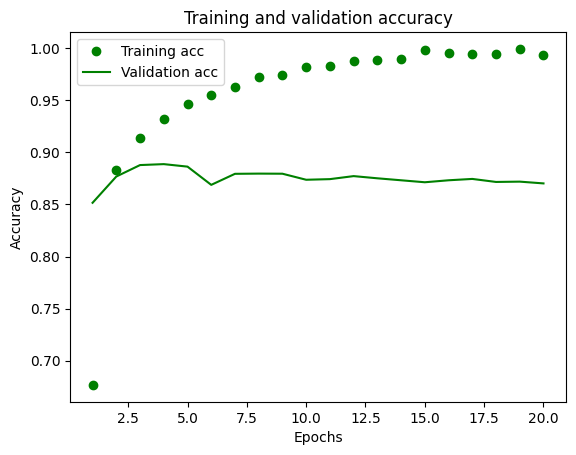

In [90]:
loss_val647 = history_dict_3_647["loss"]
val_loss_val3 = history_dict_3_647["val_loss"]
epochs3 = range(1, len(loss_val647) + 1)
plot647.plot(epochs3, loss_val647, "go", label="Training loss")
plot647.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy3 = history_dict_3_647["accuracy"]
val_accuracy3 = history_dict_3_647["val_accuracy"]
plot647.plot(epochs3, accuracy3, "go", label="Training acc")
plot647.plot(epochs3, val_accuracy3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [91]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_3_layers = model_3_layers_647.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7184 - loss: 0.5720
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9004 - loss: 0.2734
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9290 - loss: 0.2031
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8837 - loss: 0.2841


In [92]:
print(result_647_layer)

[0.27885910868644714, 0.8884000182151794]


In [93]:
model_647_layer.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.23275131],
       [0.9998543 ],
       [0.8417611 ],
       ...,
       [0.1360763 ],
       [0.08439167],
       [0.5835538 ]], dtype=float32)

In [94]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3_647 = x_train[:10000]
partial_x_train_647 = x_train[10000:]

y_val3_647 = y_train[:10000]
partial_y_train_647 = y_train[10000:]

history_3_layers_647 = model_3_layers_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3_647, y_val3_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6845 - loss: 0.6106 - val_accuracy: 0.8388 - val_loss: 0.4187
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8878 - loss: 0.3361 - val_accuracy: 0.8868 - val_loss: 0.3016
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9280 - loss: 0.2245 - val_accuracy: 0.8904 - val_loss: 0.2776
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9447 - loss: 0.1746 - val_accuracy: 0.8814 - val_loss: 0.2953
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9522 - loss: 0.1480 - val_accuracy: 0.8856 - val_loss: 0.2861
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9682 - loss: 0.1105 - val_accuracy: 0.8868 - val_loss: 0.3025
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9718 - loss: 0.0940 - val_accuracy: 0.8848 - val_loss: 0.3211
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9803 - loss: 0.0737 - val_accuracy: 0.8802 - v

In [95]:
history_dict_3_647 = history_3_layers_647.history
history_dict_3_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

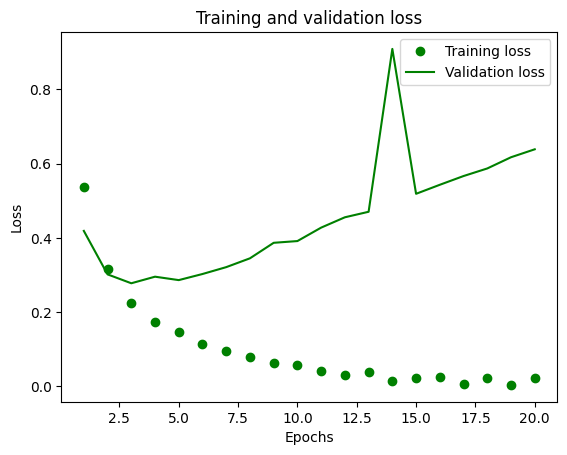

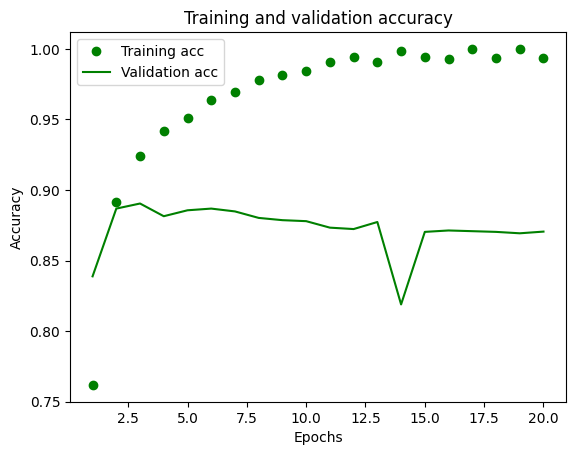

In [96]:
loss_val647 = history_dict_3_647["loss"]
val_loss_val3 = history_dict_3_647["val_loss"]
epochs3 = range(1, len(loss_val647) + 1)
plot647.plot(epochs3, loss_val647, "go", label="Training loss")
plot647.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy3 = history_dict_3_647["accuracy"]
val_accuracy3 = history_dict_3_647["val_accuracy"]
plot647.plot(epochs3, accuracy3, "go", label="Training acc")
plot647.plot(epochs3, val_accuracy3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [97]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_3_layers = model_3_layers_647.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6554 - loss: 0.6055
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8951 - loss: 0.3255
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9272 - loss: 0.2145
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8844 - loss: 0.2905


In [98]:
print(results_3_layers)

[0.2883072793483734, 0.8863199949264526]


In [99]:
model_3_layers_647.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.22604847],
       [0.99998087],
       [0.74288774],
       ...,
       [0.13457565],
       [0.1173477 ],
       [0.6008797 ]], dtype=float32)

In [100]:
model_32_units_647 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val_32_647 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_32_647 = y_train[:10000]
partial_y_train = y_train[10000:]


history_32_units_647 = model_32_units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_32_647, y_val_32_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6865 - loss: 0.5992 - val_accuracy: 0.8603 - val_loss: 0.3665
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8888 - loss: 0.3071 - val_accuracy: 0.8775 - val_loss: 0.3045
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9269 - loss: 0.2097 - val_accuracy: 0.8627 - val_loss: 0.3379
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9397 - loss: 0.1671 - val_accuracy: 0.8758 - val_loss: 0.3191
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9607 - loss: 0.1234 - val_accuracy: 0.8850 - val_loss: 0.2972
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9698 - loss: 0.0949 - val_accuracy: 0.8830 - val_loss: 0.3225
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9771 - loss: 0.0757 - val_accuracy: 0.8688 - val_loss: 0.4254
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9760 - loss: 0.0721 - val_accuracy: 0.8731 - v

In [101]:
history_dict_32_647 = history_32_units_647.history
history_dict_32_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

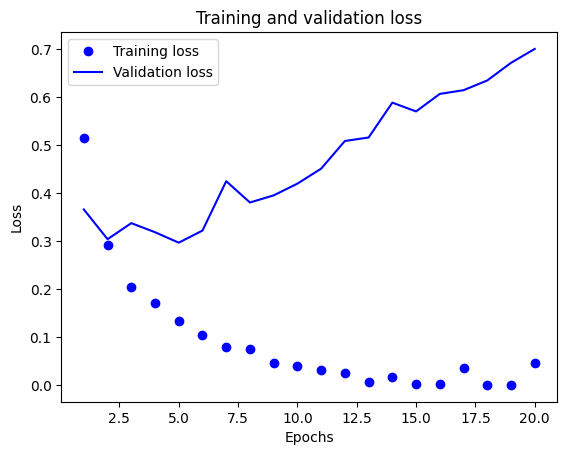

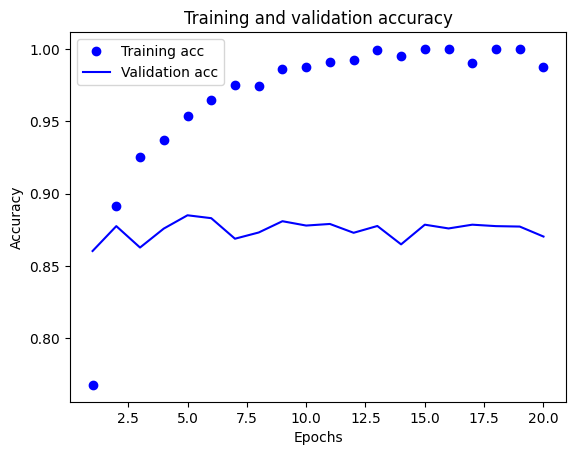

In [102]:
loss_value_32_647 = history_dict_32_647["loss"]
val_loss_value_32_647 = history_dict_32_647["val_loss"]
epochs_32 = range(1, len(loss_value_32_647) + 1)
plot647.plot(epochs_32, loss_value_32_647, "bo", label="Training loss")
plot647.plot(epochs_32, val_loss_value_32_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_32 = history_dict_32_647["accuracy"]
val_accuracy_32 = history_dict_32_647["val_accuracy"]
plot647.plot(epochs_32, accuracy_32, "bo", label="Training acc")
plot647.plot(epochs_32, val_accuracy_32, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [103]:
history_32_units_647 = model_32_units_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_32_units_647 = model_32_units_647.evaluate(x_test, y_test)
results_32_units_647

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9485 - loss: 0.2264
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9684 - loss: 0.1004
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9817 - loss: 0.0654
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8628 - loss: 0.4347


[0.42939987778663635, 0.8667600154876709]

In [104]:
model_64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64_2 = x_train[:10000]
partial_x_train_64_2 = x_train[10000:]

y_val_64_2 = y_train[:10000]
partial_y_train_64_2 = y_train[10000:]

history_64_647 = model_64_units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64_2, y_val_64_2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6485 - loss: 0.5988 - val_accuracy: 0.8406 - val_loss: 0.3907
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8961 - loss: 0.3047 - val_accuracy: 0.8790 - val_loss: 0.2992
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9146 - loss: 0.2296 - val_accuracy: 0.8762 - val_loss: 0.3083
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9323 - loss: 0.1819 - val_accuracy: 0.8866 - val_loss: 0.2807
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9456 - loss: 0.1496 - val_accuracy: 0.8837 - val_loss: 0.2888
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9608 - loss: 0.1184 - val_accuracy: 0.8649 - val_loss: 0.3644
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9658 - loss: 0.1038 - val_accuracy: 0.8678 - val_loss: 0.3705
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9754 - loss: 0.0813 - val_accuracy: 0.8728 - 

In [105]:
history_dict_64_647 = history_64_647.history
history_dict_64_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [106]:
model_64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64_2 = x_train[:10000]
partial_x_train_64_2 = x_train[10000:]

y_val_64_2 = y_train[:10000]
partial_y_train_64_2 = y_train[10000:]

history_64_647 = model_64_units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64_2, y_val_64_2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.6915 - loss: 0.5900 - val_accuracy: 0.8577 - val_loss: 0.3698
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8855 - loss: 0.3108 - val_accuracy: 0.8828 - val_loss: 0.2942
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9226 - loss: 0.2263 - val_accuracy: 0.8891 - val_loss: 0.2741
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.9411 - loss: 0.1703 - val_accuracy: 0.8666 - val_loss: 0.3350
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9345 - loss: 0.1654 - val_accuracy: 0.8831 - val_loss: 0.2954
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9609 - loss: 0.1175 - val_accuracy: 0.8852 - val_loss: 0.3025
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9702 - loss: 0.0969 - val_accuracy: 0.8774 - val_loss: 0.3473
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9795 - loss: 0.0725 - val_accuracy: 0.8802 

In [107]:
history_dict_64_647 = history_64_647.history
history_dict_64_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

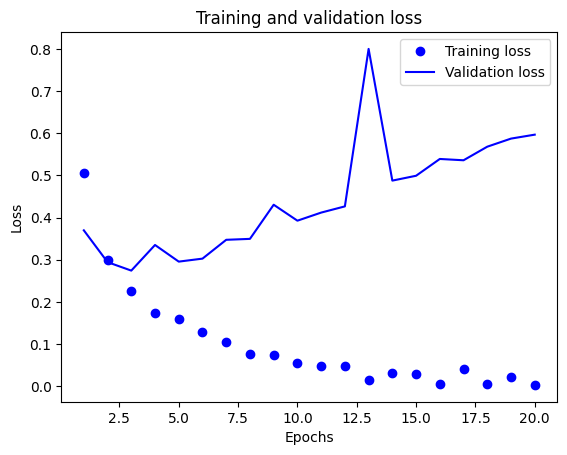

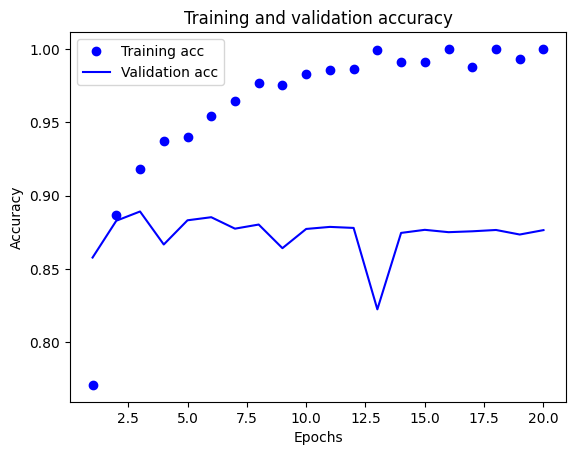

In [108]:
loss_value64 = history_dict_64_647["loss"]
val_loss_value64 = history_dict_64_647["val_loss"]
epochs_64 = range(1, len(loss_value64) + 1)
plot647.plot(epochs_64, loss_value64, "bo", label="Training loss")
plot647.plot(epochs_64, val_loss_value64, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
accuracy_64 = history_dict_64_647["accuracy"]
val_accuracy_64 = history_dict_64_647["val_accuracy"]
plot647.plot(epochs_64, accuracy_64, "bo", label="Training acc")
plot647.plot(epochs_64, val_accuracy_64, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [109]:
history_64_647 = model_64_units_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_64_units_647 = model_64_units_647.evaluate(x_test, y_test)
results_64_units_647

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9375 - loss: 0.2510
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9694 - loss: 0.1020
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9834 - loss: 0.0609
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8605 - loss: 0.4092


[0.40178459882736206, 0.8645200133323669]

In [110]:
model_64_units_647.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.04641519],
       [0.9999956 ],
       [0.9260501 ],
       ...,
       [0.12760481],
       [0.02454367],
       [0.94523245]], dtype=float32)

In [111]:
model_128units_647 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_128_647 = x_train[:10000]
partial_x_train_647 = x_train[10000:]

y_val_128_647 = y_train[:10000]
partial_y_train_647 = y_train[10000:]

history_128_3 = model_128units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_128_647, y_val_128_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.6332 - loss: 0.6176 - val_accuracy: 0.8464 - val_loss: 0.3723
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.8525 - loss: 0.3497 - val_accuracy: 0.8511 - val_loss: 0.3553
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9123 - loss: 0.2313 - val_accuracy: 0.8885 - val_loss: 0.2765
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9415 - loss: 0.1608 - val_accuracy: 0.8628 - val_loss: 0.3616
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9338 - loss: 0.1657 - val_accuracy: 0.8823 - val_loss: 0.3116
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9714 - loss: 0.0912 - val_accuracy: 0.8486 - val_loss: 0.5113
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.9686 - loss: 0.0881 - val_accuracy: 0.8836 - val_loss: 0.3439
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9936 - loss: 0.0286 - val_accuracy: 0.8

In [112]:
history_dict_128_3 = history_128_3.history
history_dict_128_3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

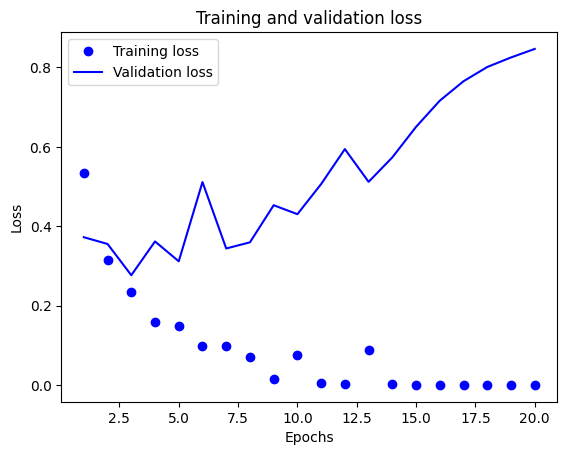

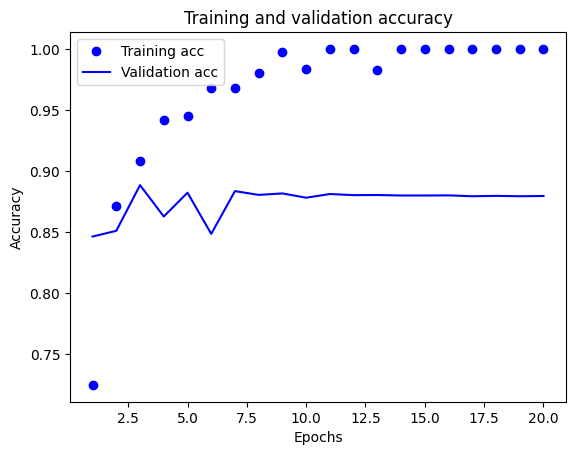

In [113]:
loss_value128_3 = history_dict_128_3["loss"]
val_loss_value128_3 = history_dict_128_3["val_loss"]
epochs_128 = range(1, len(loss_value128_3) + 1)
plot647.plot(epochs_128, loss_value128_3, "bo", label="Training loss")
plot647.plot(epochs_128, val_loss_value128_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_128 = history_dict_128_3["accuracy"]
val_accuracy_128 = history_dict_128_3["val_accuracy"]
plot647.plot(epochs_128, accuracy_128, "bo", label="Training acc")
plot647.plot(epochs_128, val_accuracy_128, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [114]:
history_128_3 = model_128units_647.fit(x_train, y_train, epochs=2, batch_size=512)
results_128_units_3 = model_128units_647.evaluate(x_test, y_test)
results_128_units_3

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9296 - loss: 0.3675
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9713 - loss: 0.0916
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8733 - loss: 0.3646


[0.3663959801197052, 0.8749200105667114]

In [115]:
model_128units_647.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([[0.00854527],
       [0.9999993 ],
       [0.56626767],
       ...,
       [0.00737874],
       [0.00681615],
       [0.8902984 ]], dtype=float32)

MSE Loss Function model with 16 units and 3-layers

In [116]:
MSE_model_16_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSE_model_16_647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation of model
x_val_MSE_16 = x_train[:10000]
partial_x_train_16 = x_train[10000:]

y_val_MSE_16 = y_train[:10000]
partial_y_train_16 = y_train[10000:]
# Model Fit

history_MSE_647 = MSE_model_16_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_MSE_16, y_val_MSE_16))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6514 - loss: 0.2306 - val_accuracy: 0.8363 - val_loss: 0.1570
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8584 - loss: 0.1370 - val_accuracy: 0.8722 - val_loss: 0.1078
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9026 - loss: 0.0883 - val_accuracy: 0.8762 - val_loss: 0.0972
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9245 - loss: 0.0685 - val_accuracy: 0.8817 - val_loss: 0.0890
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9327 - loss: 0.0584 - val_accuracy: 0.8704 - val_loss: 0.0945
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9383 - loss: 0.0516 - val_accuracy: 0.8779 - val_loss: 0.0913
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9562 - loss: 0.0418 - val_accuracy: 0.8858 - val_loss: 0.0853
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9622 - loss: 0.0369 - val_accuracy: 0.8850 - v

In [117]:
historydict_MSE_647 = history_MSE_647.history
historydict_MSE_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

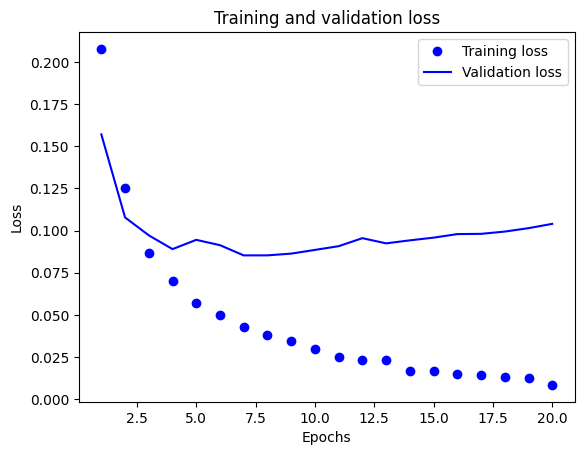

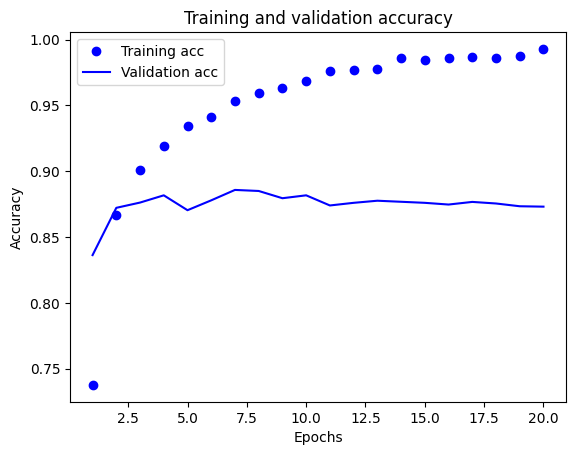

In [118]:
import matplotlib.pyplot as plot647
loss_value_MSE_16_3 = historydict_MSE_647["loss"]
val_loss_value_MSE_16_3 = historydict_MSE_647["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE_16_3) + 1)
plot647.plot(epochs_MSE, loss_value_MSE_16_3, "bo", label="Training loss")
plot647.plot(epochs_MSE, val_loss_value_MSE_16_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_MSE = historydict_MSE_647["accuracy"]
val_acc_MSE = historydict_MSE_647["val_accuracy"]
plot647.plot(epochs_MSE, acc_MSE, "bo", label="Training acc")
plot647.plot(epochs_MSE, val_acc_MSE, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [119]:
MSE_model_16_647.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE_647 = MSE_model_16_647.evaluate(x_test, y_test)
results_MSE_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9416 - loss: 0.0497
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9578 - loss: 0.0371
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9645 - loss: 0.0319
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9697 - loss: 0.0286
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9750 - loss: 0.0239
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9761 - loss: 0.0235
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9798 - loss: 0.0198
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9814 - loss: 0.0188
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8644 - loss: 0.1124


[0.11023791134357452, 0.8670799732208252]

In [120]:
MSE_model_16_647.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.02738004],
       [1.        ],
       [0.15260053],
       ...,
       [0.04235547],
       [0.01303633],
       [0.7670964 ]], dtype=float32)

In [121]:
tanh_647 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

tanh_647.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

x_val_tanh = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_tanh = y_train[:10000]
partial_y_train = y_train[10000:]


historytanh_model = tanh_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_tanh, y_val_tanh))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6904 - loss: 0.2055 - val_accuracy: 0.8613 - val_loss: 0.1313
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8916 - loss: 0.1132 - val_accuracy: 0.8815 - val_loss: 0.1046
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9126 - loss: 0.0866 - val_accuracy: 0.8865 - val_loss: 0.0940
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9255 - loss: 0.0718 - val_accuracy: 0.8761 - val_loss: 0.0941
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9374 - loss: 0.0617 - val_accuracy: 0.8865 - val_loss: 0.0858
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9470 - loss: 0.0542 - val_accuracy: 0.8768 - val_loss: 0.0916
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9458 - loss: 0.0512 - val_accuracy: 0.8845 - val_loss: 0.0861
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9536 - loss: 0.0452 - val_accuracy: 0.8877 - v

In [122]:
historydict_tanh_647 = historytanh_model.history
historydict_tanh_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

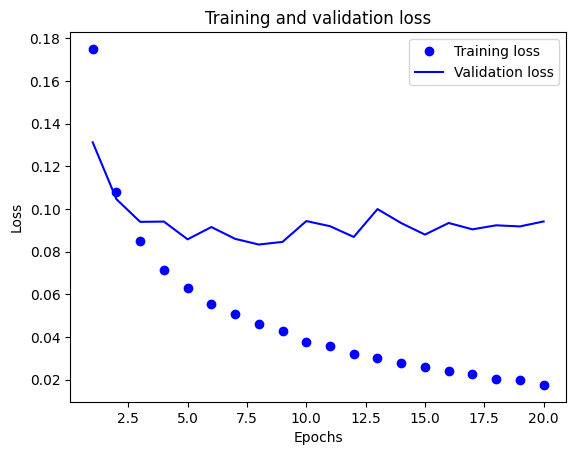

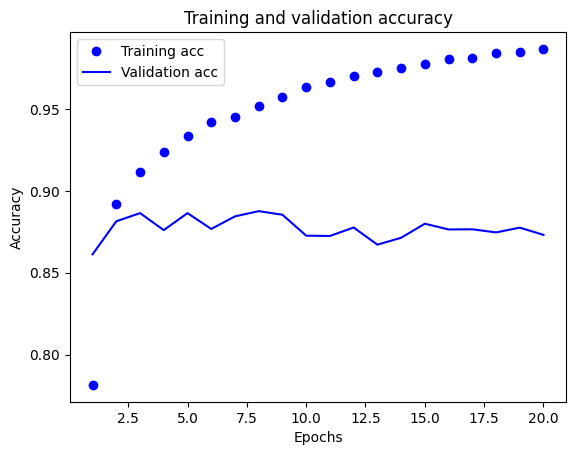

In [123]:
loss_value_tanh_647= historydict_tanh_647["loss"]
val_loss_value_tanh_647 = historydict_tanh_647["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh_647) + 1)
plot647.plot(epochs_tanh, loss_value_tanh_647, "bo", label="Training loss")
plot647.plot(epochs_tanh, val_loss_value_tanh_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc_tanh = historydict_tanh_647["accuracy"]
val_acc_tanh = historydict_tanh_647["val_accuracy"]
plot647.plot(epochs_tanh, acc_tanh, "bo", label="Training acc")
plot647.plot(epochs_tanh, val_acc_tanh, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [124]:
tanh_647.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh_647 = tanh_647.evaluate(x_test, y_test)
results_tanh_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9432 - loss: 0.0486
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9560 - loss: 0.0391
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9597 - loss: 0.0361
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9659 - loss: 0.0323
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9667 - loss: 0.0317
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9700 - loss: 0.0290
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9731 - loss: 0.0273
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9763 - loss: 0.0249
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8633 - loss: 0.1067


[0.10421992093324661, 0.8677999973297119]

Adam Operator with 16 units and 3-layers

In [126]:
adam_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

adam_647.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_adam_647 = x_train[:10000]
partial_x_train_16 = x_train[10000:]

y_adam_647 = y_train[:10000]
partial_y_train_16 = y_train[10000:]


historyadam_647 = adam_647.fit(partial_x_train_16,
                    partial_y_train_16,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_adam_647, y_adam_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.5659 - loss: 0.6566 - val_accuracy: 0.8370 - val_loss: 0.4950
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8862 - loss: 0.4025 - val_accuracy: 0.8845 - val_loss: 0.2941
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9402 - loss: 0.1889 - val_accuracy: 0.8831 - val_loss: 0.2868
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9668 - loss: 0.1182 - val_accuracy: 0.8801 - val_loss: 0.3231
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9833 - loss: 0.0686 - val_accuracy: 0.8757 - val_loss: 0.3780
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9908 - loss: 0.0505 - val_accuracy: 0.8736 - val_loss: 0.4215
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9952 - loss: 0.0327 - val_accuracy: 0.8702 - val_loss: 0.4689
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9983 - loss: 0.0174 - val_accuracy: 0.8702 - v

In [127]:
historydict_adam_647 = historyadam_647.history
historydict_adam_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

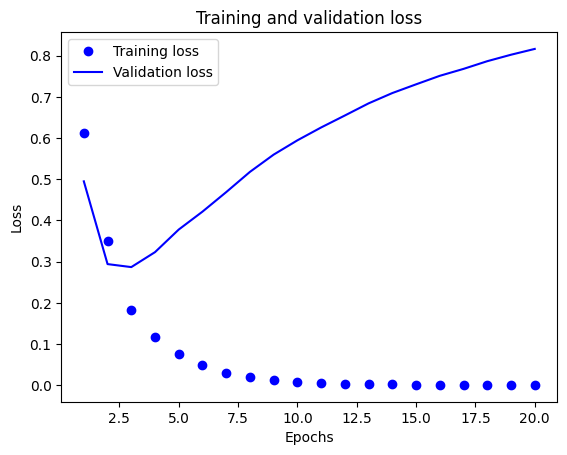

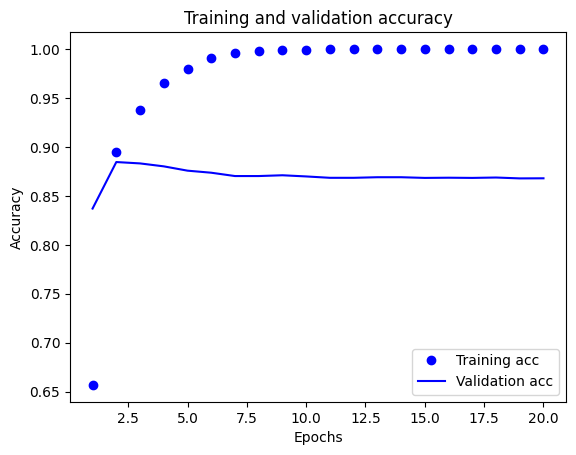

In [128]:
loss_value_adam_647 = historydict_adam_647["loss"]
val_loss_value_adam_647 = historydict_adam_647["val_loss"]
epochs_adam = range(1, len(loss_value_adam_647) + 1)
plot647.plot(epochs_adam, loss_value_adam_647, "bo", label="Training loss")
plot647.plot(epochs_adam, val_loss_value_adam_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_adam = historydict_adam_647["accuracy"]
val_acc_adam = historydict_adam_647["val_accuracy"]
plot647.plot(epochs_adam, acc_adam, "bo", label="Training acc")
plot647.plot(epochs_adam, val_acc_adam, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [129]:
adam_647.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = adam_647.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9351 - loss: 0.2823
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9621 - loss: 0.1176
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9796 - loss: 0.0721
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9901 - loss: 0.0430
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8579 - loss: 0.5440


[0.538260817527771, 0.8588399887084961]

Regularization model with 16 units and 2-layers

In [131]:
from tensorflow.keras import regularizers
regularization647 = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
regularization647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_regularization647 = regularization647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_regularization647 = history_regularization647.history
historydict_regularization647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6416 - loss: 0.6754 - val_accuracy: 0.8138 - val_loss: 0.5027
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8786 - loss: 0.4362 - val_accuracy: 0.8817 - val_loss: 0.3857
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9156 - loss: 0.3234 - val_accuracy: 0.8776 - val_loss: 0.3596
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9282 - loss: 0.2709 - val_accuracy: 0.8851 - val_loss: 0.3368
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9373 - loss: 0.2428 - val_accuracy: 0.8829 - val_loss: 0.3413
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9481 - loss: 0.2168 - val_accuracy: 0.8857 - val_loss: 0.3381
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9551 - loss: 0.2004 - val_accuracy: 0.8755 - val_loss: 0.3634
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9647 - loss: 0.1829 - val_accuracy: 0.8789 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

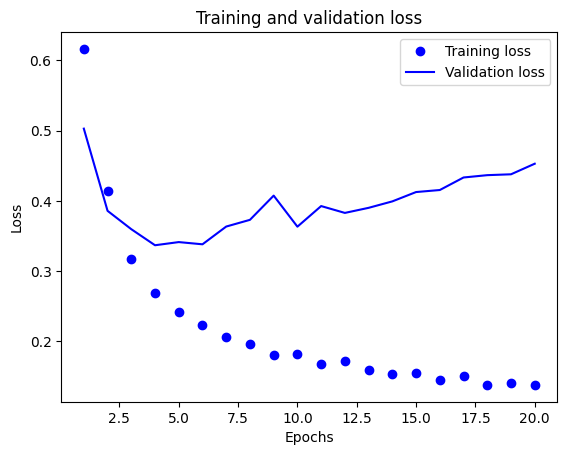

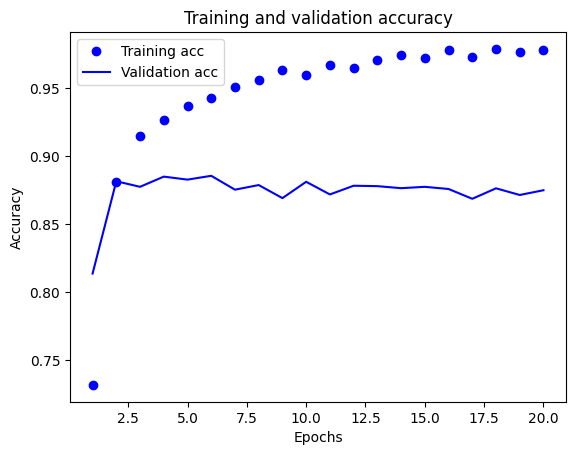

In [132]:
loss_valu_647 = historydict_regularization647["loss"]
val_loss_value_r_647 = historydict_regularization647["val_loss"]
epochs_r = range(1, len(loss_valu_647) + 1)
plot647.plot(epochs_r, loss_valu_647, "bo", label="Training loss")
plot647.plot(epochs_r, val_loss_value_r_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc_r = historydict_regularization647["accuracy"]
val_acc_r = historydict_regularization647["val_accuracy"]
plot647.plot(epochs_r, acc_r, "bo", label="Training acc")
plot647.plot(epochs_r, val_acc_r, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [133]:
regularization647.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization_647 = regularization647.evaluate(x_test, y_test)
results_regularization_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9369 - loss: 0.2602
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9509 - loss: 0.2038
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9542 - loss: 0.1930
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9592 - loss: 0.1775
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9601 - loss: 0.1764
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9655 - loss: 0.1641
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9685 - loss: 0.1595
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9686 - loss: 0.1592
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8611 - loss: 0.4436


[0.4401252865791321, 0.864359974861145]

Dropout function with 16 units and 3-layers

In [135]:
from tensorflow.keras import regularizers
Dropout647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Dropout647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_Dropout_647 = Dropout647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_Dropout_647 = history_Dropout_647.history
historydict_Dropout_647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5375 - loss: 0.6864 - val_accuracy: 0.7341 - val_loss: 0.6369
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7033 - loss: 0.6212 - val_accuracy: 0.8054 - val_loss: 0.5604
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8026 - loss: 0.5546 - val_accuracy: 0.8471 - val_loss: 0.5044
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8453 - loss: 0.5092 - val_accuracy: 0.8755 - val_loss: 0.4611
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8711 - loss: 0.4656 - val_accuracy: 0.8646 - val_loss: 0.4365
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8860 - loss: 0.4254 - val_accuracy: 0.8723 - val_loss: 0.4187
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8965 - loss: 0.3913 - val_accuracy: 0.8760 - val_loss: 0.4015
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8983 - loss: 0.3724 - val_accuracy: 0.8743 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

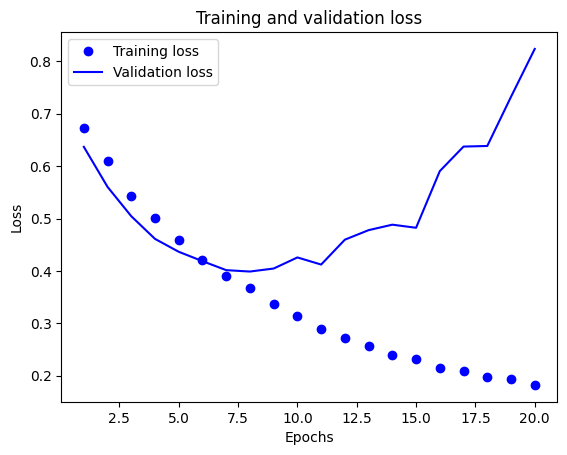

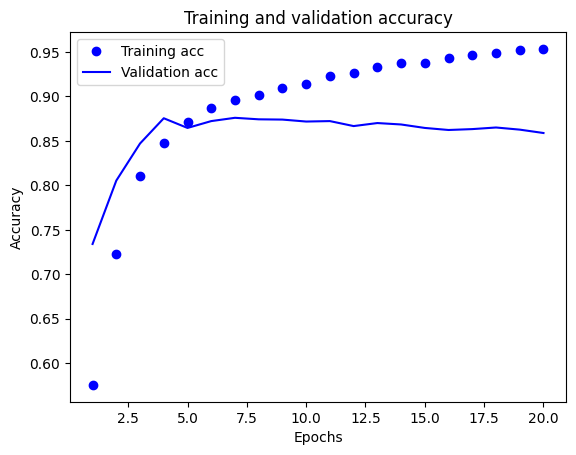

In [136]:
loss_val_647 = historydict_Dropout_647["loss"]
val_loss_val_d_647 = historydict_Dropout_647["val_loss"]
epochs_d = range(1, len(loss_val_647) + 1)
plot647.plot(epochs_d, loss_val_647, "bo", label="Training loss")
plot647.plot(epochs_d, val_loss_val_d_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_d = historydict_Dropout_647["accuracy"]
val_acc_d = historydict_Dropout_647["val_accuracy"]
plot647.plot(epochs_d, acc_d, "bo", label="Training acc")
plot647.plot(epochs_d, val_acc_d, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [137]:
Dropout647.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout647 = Dropout647.evaluate(x_test, y_test)
results_Dropout647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9006 - loss: 0.3851
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9072 - loss: 0.3205
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9160 - loss: 0.2928
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9256 - loss: 0.2600
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9275 - loss: 0.2503
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9295 - loss: 0.2453
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9317 - loss: 0.2314
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9354 - loss: 0.2198
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8561 - loss: 0.5605


[0.5733245015144348, 0.8596000075340271]

Training model with hyper tuned parameters with 32 units and 3 -layers

In [139]:
from tensorflow.keras import regularizers
Hyper647 = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hyper647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_Hyper647 = Hyper647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictHyper647 = history_Hyper647.history
history_dictHyper647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5316 - loss: 0.2579 - val_accuracy: 0.8156 - val_loss: 0.2052
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6984 - loss: 0.2112 - val_accuracy: 0.8459 - val_loss: 0.1462
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8075 - loss: 0.1615 - val_accuracy: 0.8715 - val_loss: 0.1123
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8618 - loss: 0.1254 - val_accuracy: 0.8836 - val_loss: 0.0984
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8863 - loss: 0.1060 - val_accuracy: 0.8847 - val_loss: 0.0986
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9123 - loss: 0.0892 - val_accuracy: 0.8858 - val_loss: 0.0981
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9201 - loss: 0.0805 - val_accuracy: 0.8869 - val_loss: 0.1000
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9311 - loss: 0.0730 - val_accuracy: 0.8878 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

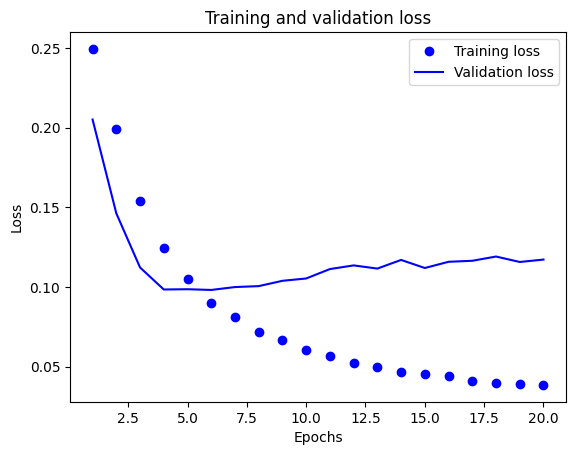

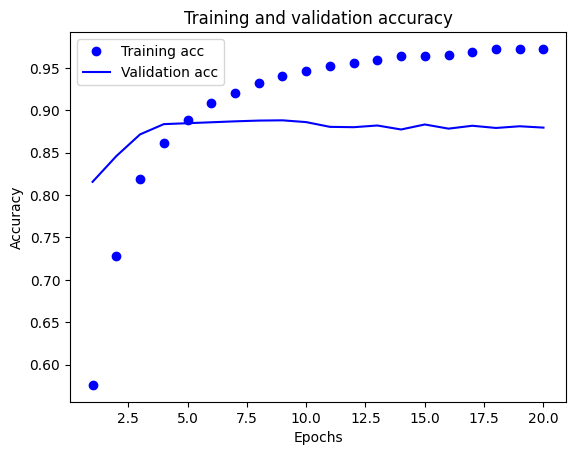

In [140]:
loss_va_h_647 = history_dictHyper647["loss"]
val_loss_va_h_647 = history_dictHyper647["val_loss"]
epochs_h = range(1, len(loss_va_h_647) + 1)
plot647.plot(epochs_h, loss_va_h_647, "bo", label="Training loss")
plot647.plot(epochs_h, val_loss_va_h_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_h = history_dictHyper647["accuracy"]
val_acc_h = history_dictHyper647["val_accuracy"]
plot647.plot(epochs_h, acc_h, "bo", label="Training acc")
plot647.plot(epochs_h, val_acc_h, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [141]:
Hyper647.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper647 = Hyper647.evaluate(x_test, y_test)
results_Hyper647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9297 - loss: 0.0728
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9395 - loss: 0.0648
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9442 - loss: 0.0599
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9471 - loss: 0.0574
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9529 - loss: 0.0526
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9521 - loss: 0.0538
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9592 - loss: 0.0487
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9592 - loss: 0.0482
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8786 - loss: 0.1150


[0.11297644674777985, 0.881600022315979]

**Create a scatter plot showing the accuracy vs. loss for different models, annotate each point with model labels, and display the plot with axis labels and a title**

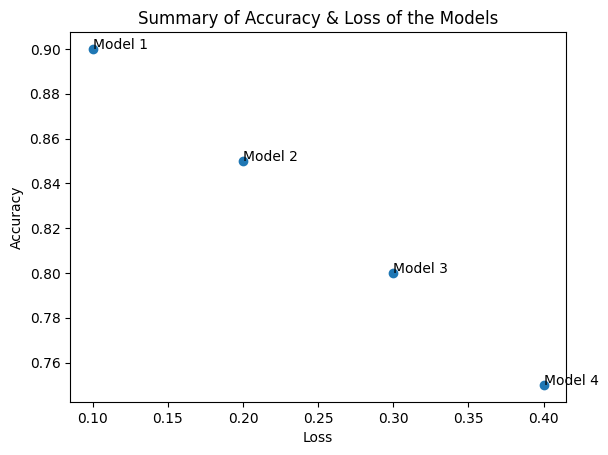

In [144]:
Models_Loss = [0.1, 0.2, 0.3, 0.4]  # Example loss values
Models_Accuracy = [0.9, 0.85, 0.8, 0.75]  # Example accuracy values
Labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']  # Labels for each point

fig, axis = plot647.subplots()
axis.scatter(Models_Loss, Models_Accuracy)
for i, txt in enumerate(Labels):
    axis.annotate(txt, (Models_Loss[i], Models_Accuracy[i]))
plot647.title("Summary of Accuracy & Loss of the Models")
plot647.ylabel("Accuracy")
plot647.xlabel("Loss")

plot647.show()


**Description**

Data had to be imported, review analysis settings had to be adjusted, and then binary cross entropy and relu activation were used to build a basic neural network with a single 16-unit hidden layer. More study was done to enhance the performance of the model. This involved adjusting the number of hidden levels (one to three) and units per layer (32, 64, and 128). Overfitting was a possibility, even though accuracy was typically improved by increasing the number of concealed units. Moreover, replacing binary cross entropy with mean squared error (MSE) loss did not significantly alter the model's performance. All things considered, the findings suggested that although adjusting the design and parameters might increase accuracy, choosing the appropriate loss functions and preventing overfitting needed significant thought.